In [10]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np

In [11]:
#grabbing the mnist dataset
((X_train, Y_train), (X_test, Y_test)) = mnist.load_data()
X_train = X_train.reshape((X_train.shape[0], 28 * 28 * 1))
X_test = X_test.reshape((X_test.shape[0], 28 * 28 * 1))
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

In [12]:
lb = LabelBinarizer()
Y_train = lb.fit_transform(Y_train)
Y_test = lb.transform(Y_test)

In [13]:

#building the model
model = Sequential()
model.add(Dense(128, input_shape=(784,), activation="sigmoid"))
model.add(Dense(64, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

In [14]:
sgd = SGD(0.01)
epochs=10
model.compile(loss="categorical_crossentropy", optimizer=sgd,metrics=["accuracy"])
H = model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=epochs, batch_size=128)

Epoch 1/10
469/469 [==============================] - 3s 4ms/step - loss: 2.2860 - accuracy: 0.1702 - val_loss: 2.2524 - val_accuracy: 0.2208
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 2.2271 - accuracy: 0.3400 - val_loss: 2.1952 - val_accuracy: 0.4245
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 2.1623 - accuracy: 0.4901 - val_loss: 2.1175 - val_accuracy: 0.6082
Epoch 4/10
469/469 [==============================] - 3s 7ms/step - loss: 2.0719 - accuracy: 0.5810 - val_loss: 2.0076 - val_accuracy: 0.6402
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 1.9442 - accuracy: 0.6346 - val_loss: 1.8560 - val_accuracy: 0.6511
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 1.7777 - accuracy: 0.6589 - val_loss: 1.6719 - val_accuracy: 0.6801
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 1.5897 - accuracy: 0.6811 - val_loss: 1.4808 - val_accuracy: 0.7015
Epoch 

In [15]:

#making the predictions
predictions = model.predict(X_test, batch_size=128)
print(classification_report(Y_test.argmax(axis=1),predictions.argmax(axis=1),target_names=[str(x) for x in lb.classes_]))

79/79 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.80      0.95      0.87       980
           1       0.78      0.99      0.87      1135
           2       0.85      0.74      0.79      1032
           3       0.58      0.79      0.67      1010
           4       0.68      0.79      0.73       982
           5       0.78      0.35      0.48       892
           6       0.83      0.89      0.86       958
           7       0.83      0.87      0.85      1028
           8       0.76      0.51      0.61       974
           9       0.71      0.58      0.64      1009

    accuracy                           0.75     10000
   macro avg       0.76      0.75      0.74     10000
weighted avg       0.76      0.75      0.74     10000



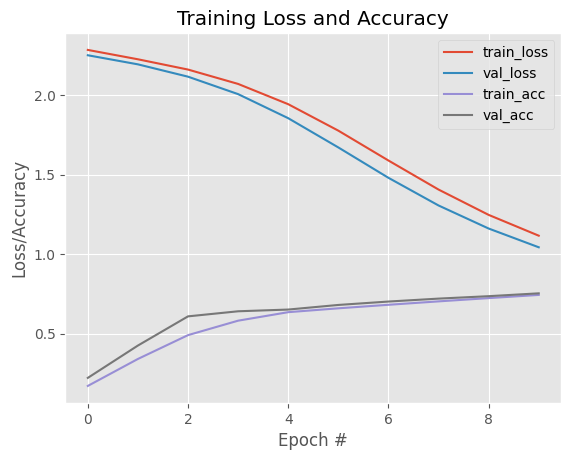

In [16]:
#plotting the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()